# NeuroData Design:
## Sprint 1 | Week 6
Vivek Gopalakrishnan

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict

from load_emb import emb

### Start by visualizing the graph:

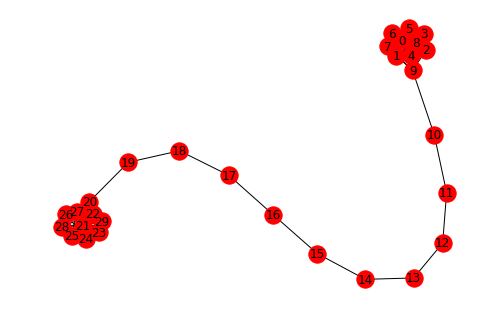

In [2]:
# Load the barbell graph
G = nx.read_edgelist('barbell.edgelist')

# Visualize it
nx.draw(G, with_labels = True)

In [3]:
# Write the labels for each node
labels = {
    0:['0'+str(x) for x in range(9)] + [str(x) for x in range(21,30)],
    1:['09','20'],
    2:['10','19'],
    3:['11','18'],
    4:['12','17'],
    5:['13','16'],
    6:['14','15']
         }

flipped_labels = {}
for key, value in labels.items():
    for x in value:
        flipped_labels[x]=key
        
labels = list(OrderedDict(sorted(flipped_labels.items())).values())

In [19]:
# Make a consistent colormap for the 
cmap = plt.get_cmap('jet', 7)

# Standard parameters for figures
figparams = {'figsize':(5,3), 'dpi':500}

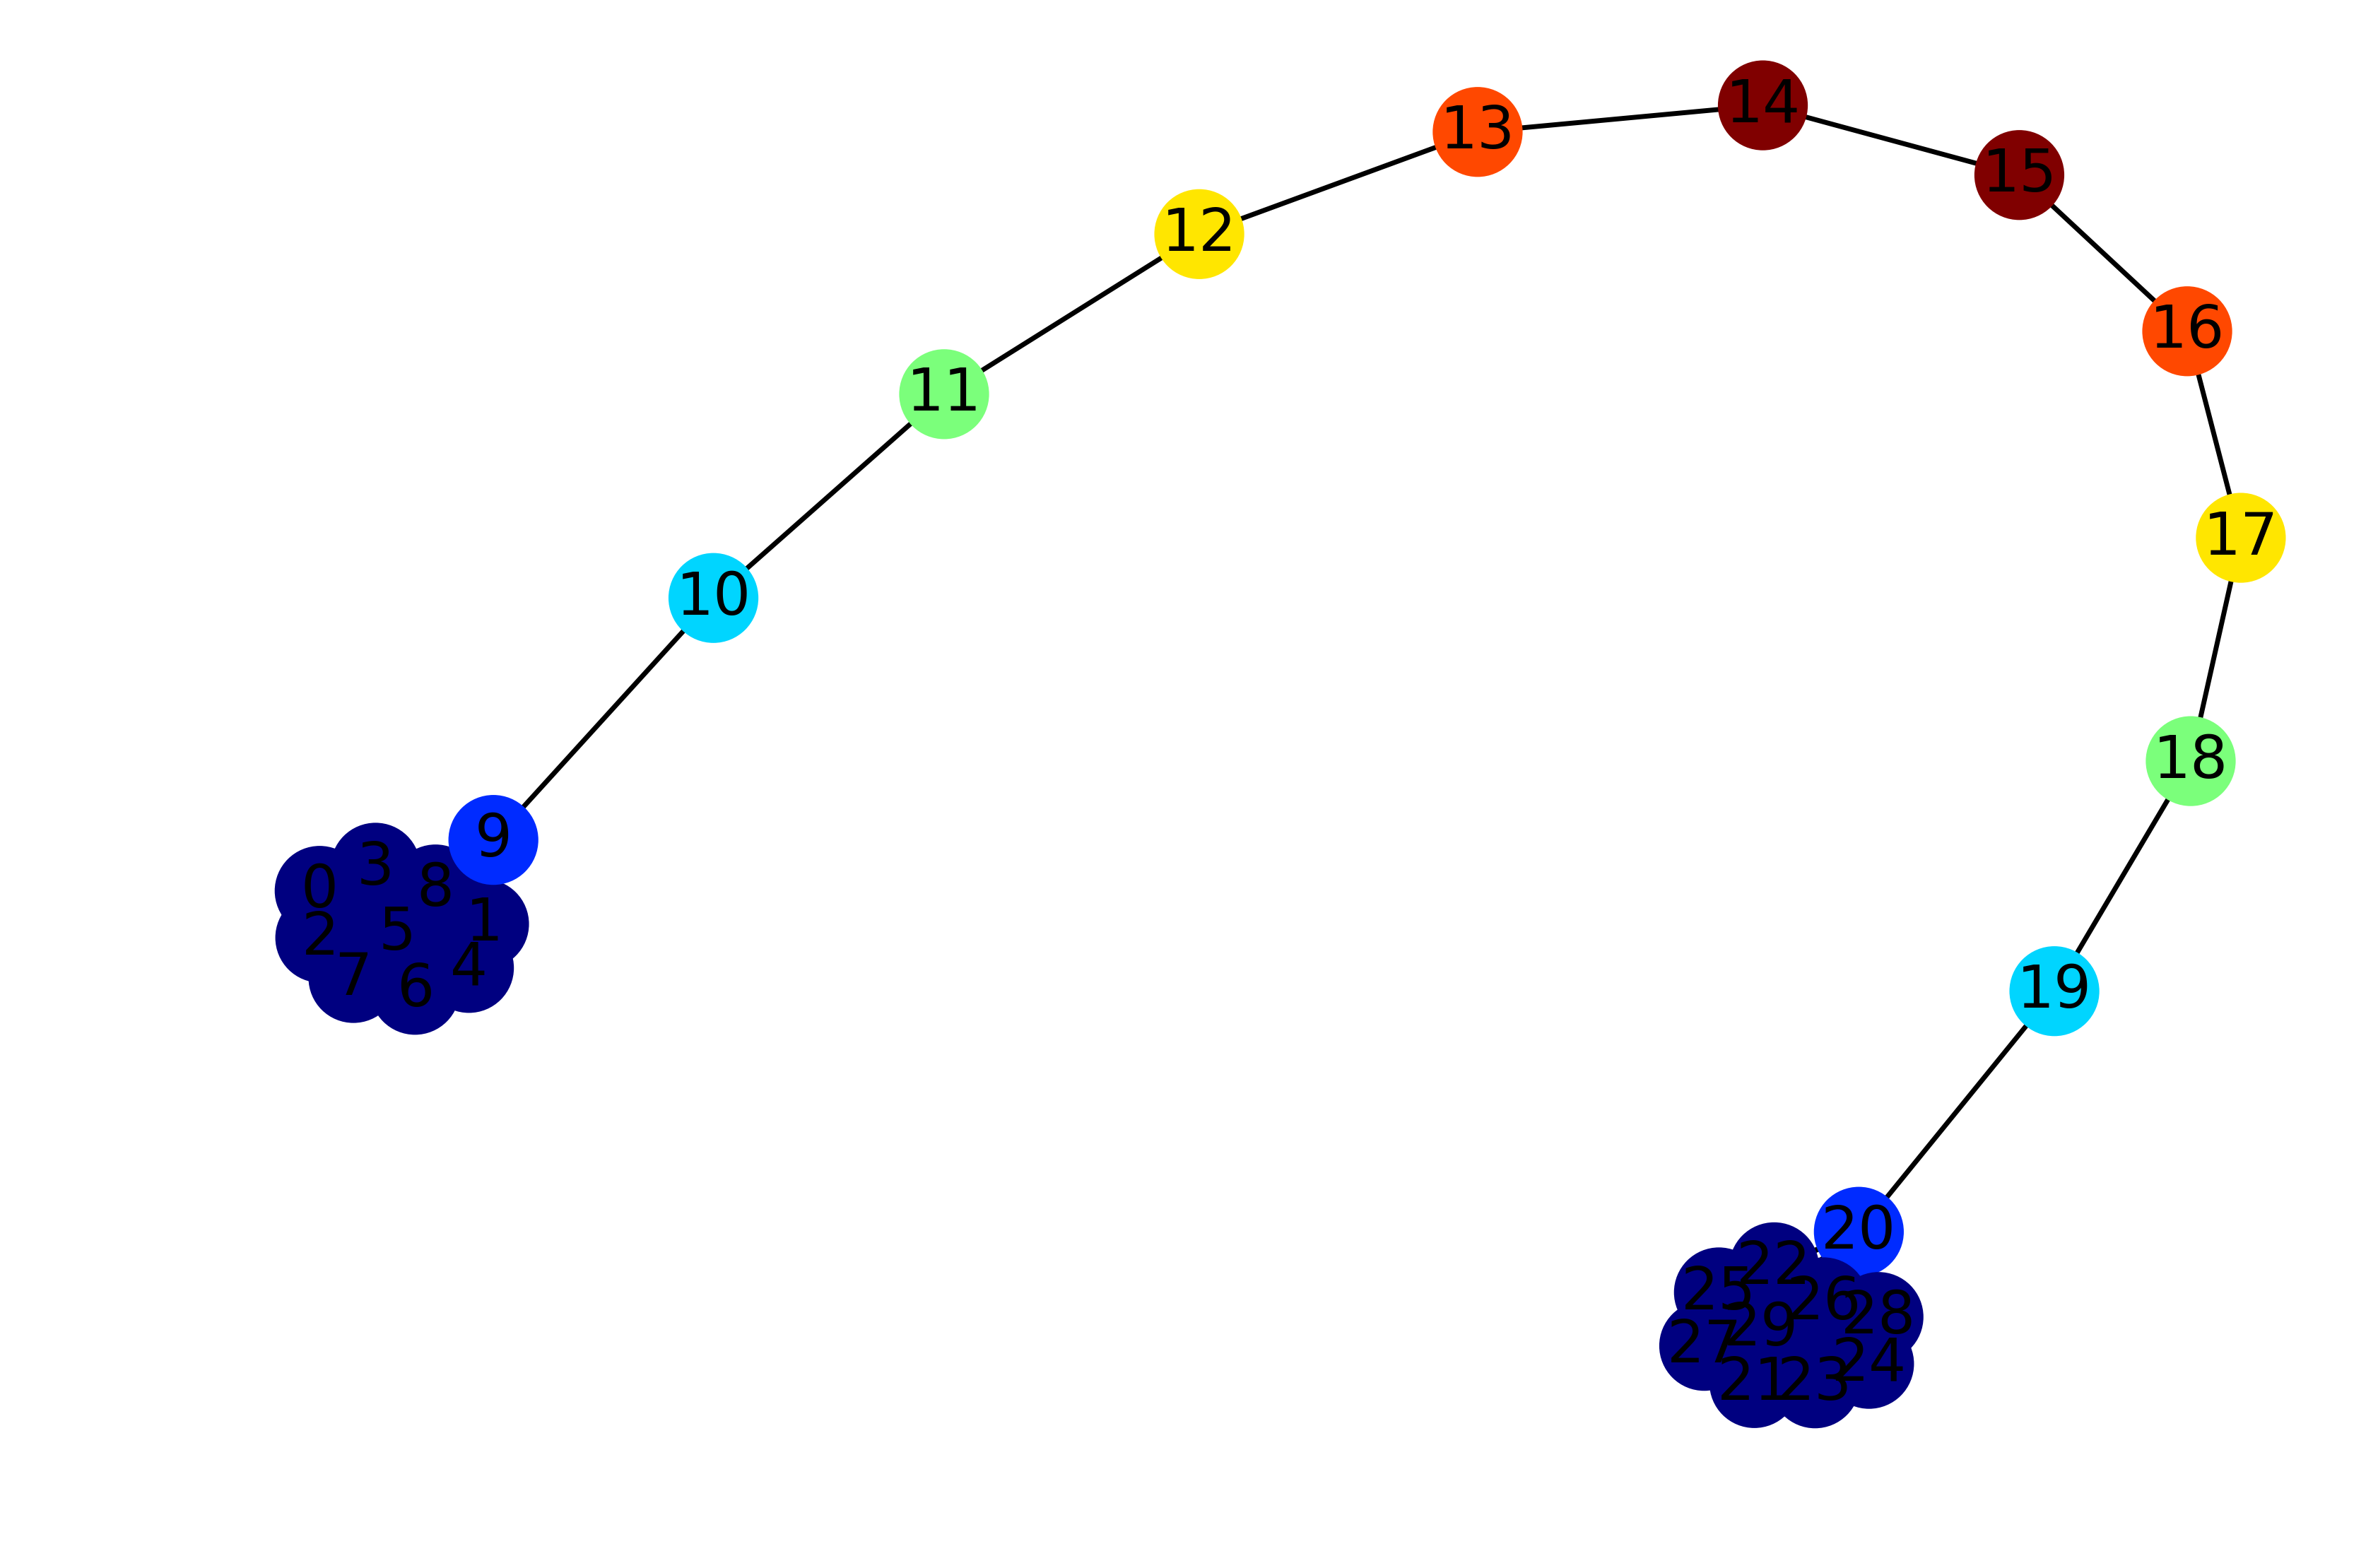

In [15]:
# Draw with colormap
plt.figure(dpi=500)
nx.draw(G, 
        node_color = labels,
        cmap = cmap, 
        with_labels = True
       )
plt.show()

### Now load the embeddings made by _struc2vec_

For this experiment, the same barbell graph was run through struc2vec three times. Because struc2vec is a randomized algorithm, the results of the embedding should be different each time we run it, even though the input is the same.

In [6]:
# Load the previously generated embeddings
t1 = emb('barbell2d-trial1.emb')
t2 = emb('barbell2d-trial2.emb')
t3 = emb('barbell2d-trial3.emb')

embeddings = [t1, t2, t3]

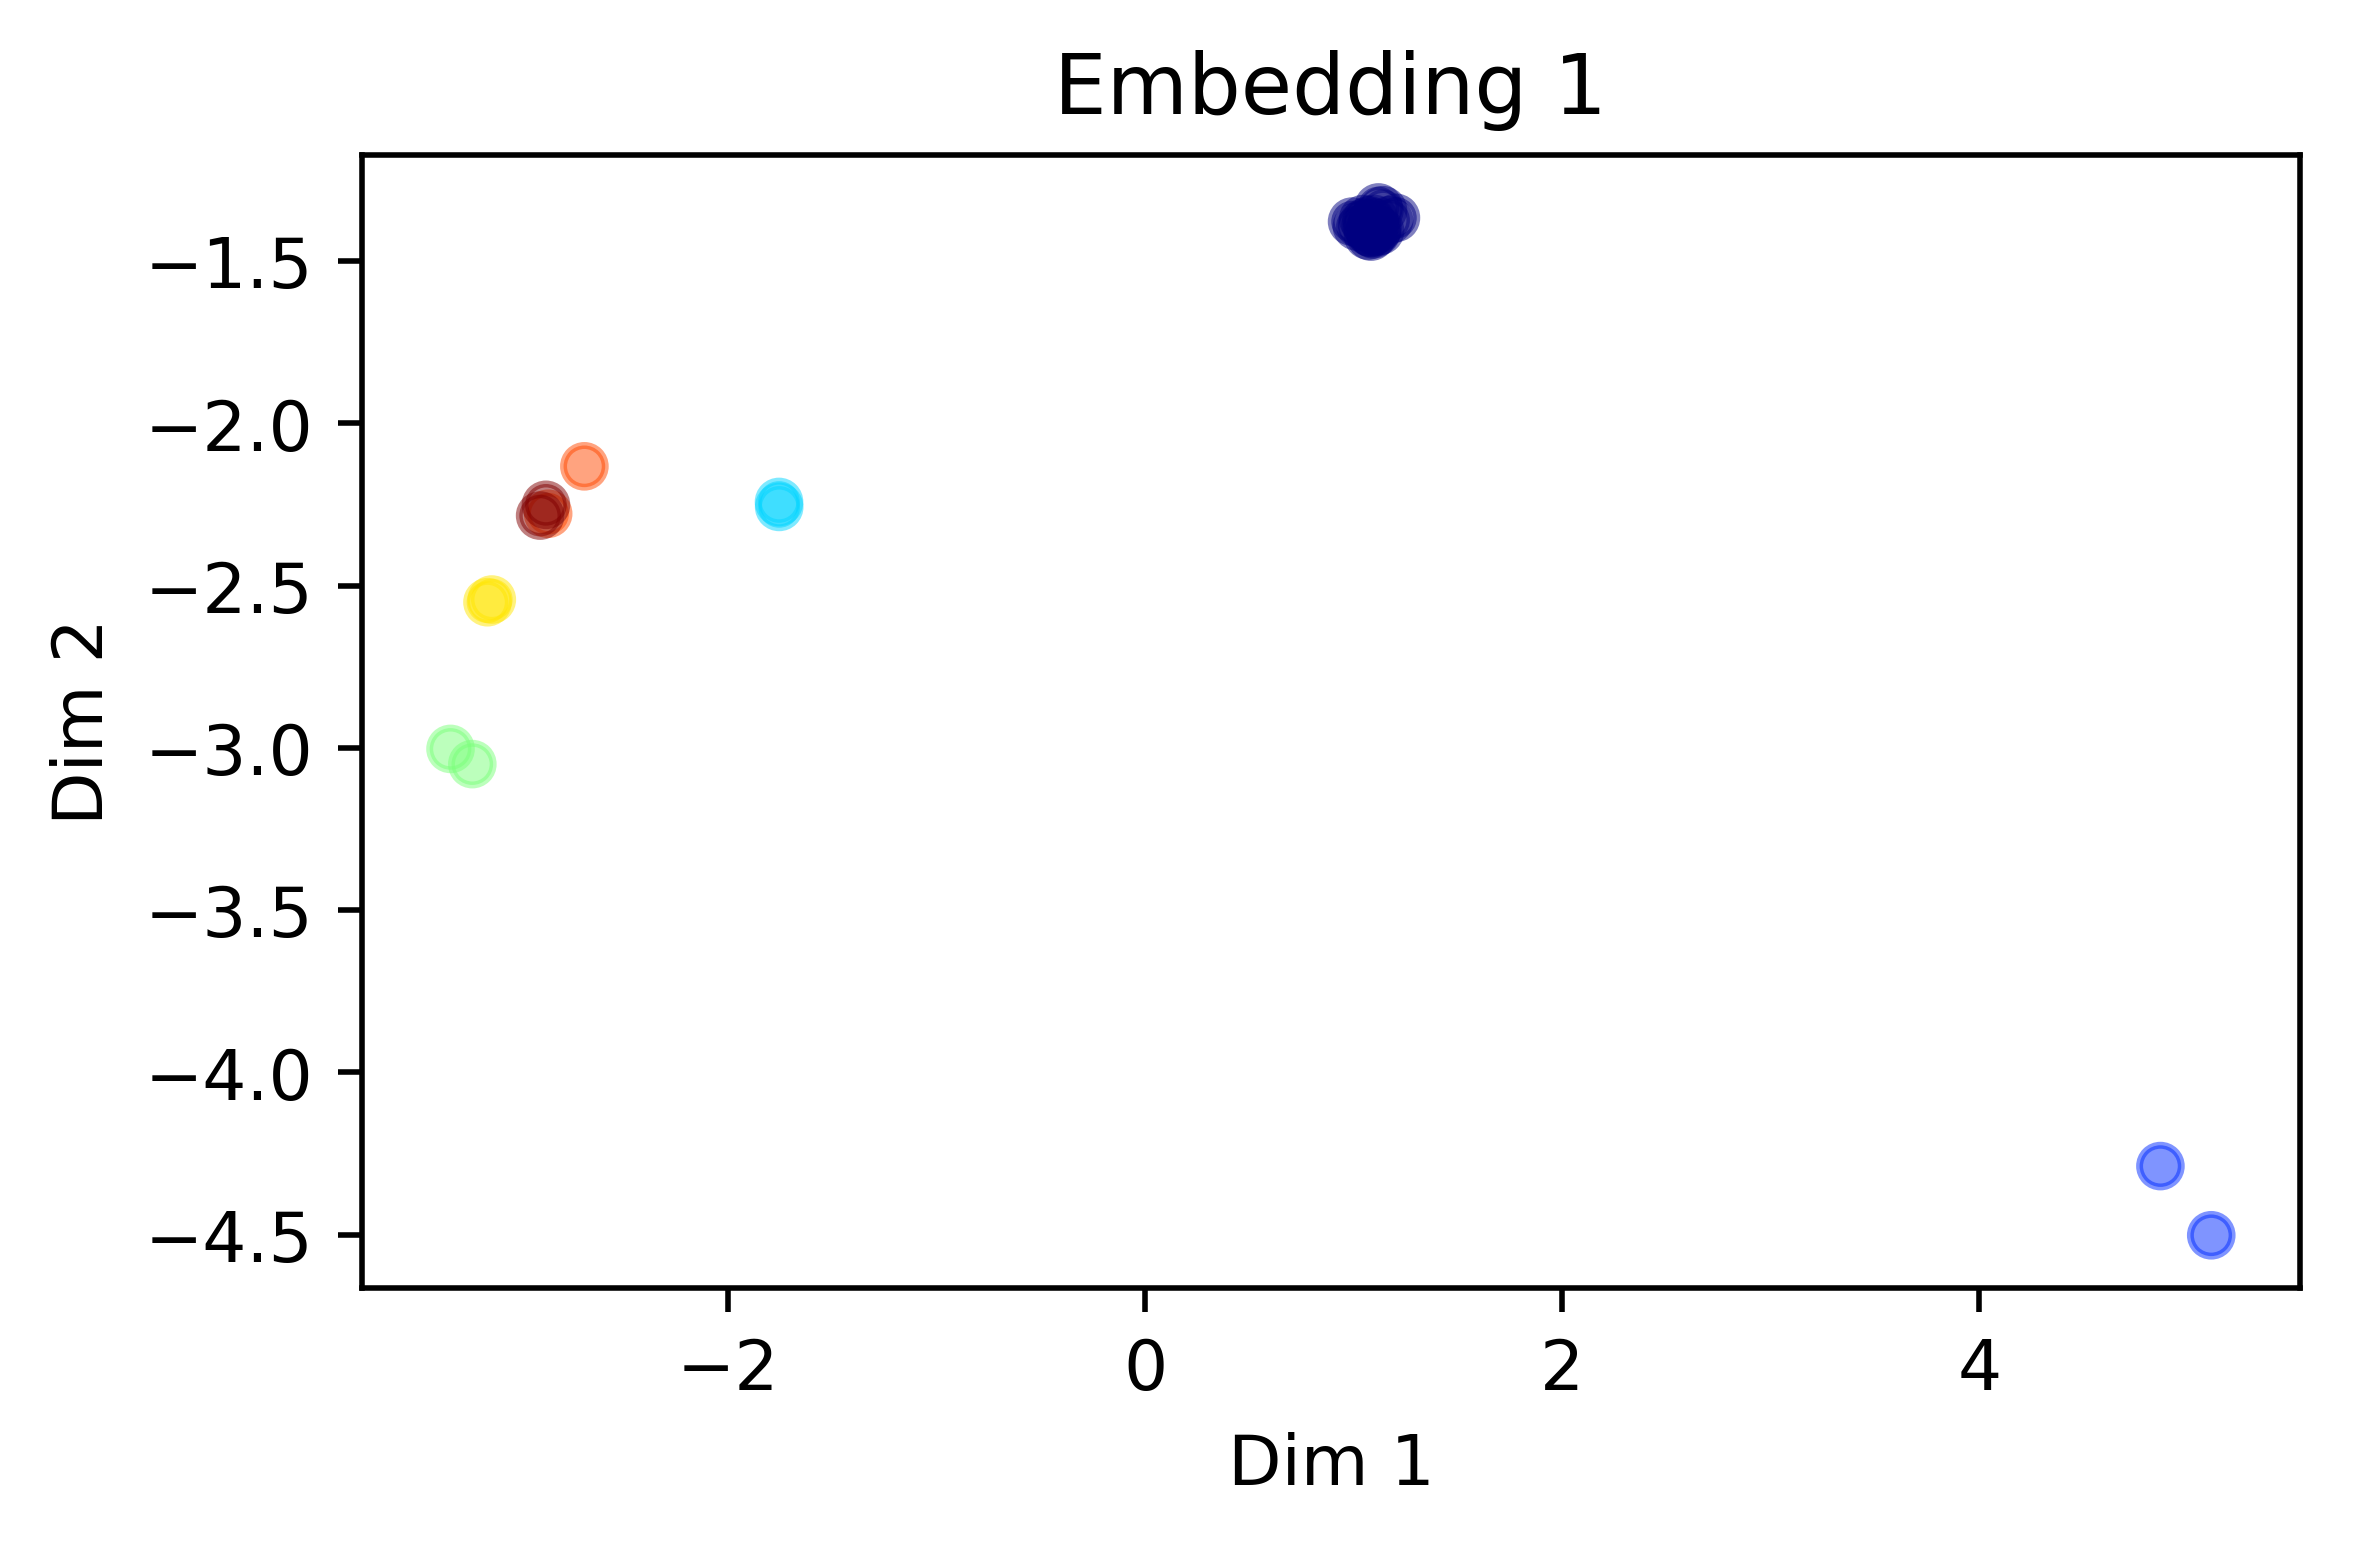

In [7]:
# Plot the first embedding
plt.figure(**figparams)

plt.scatter(x=t1.data[:,1], y=t1.data[:,2], 
            c=labels, cmap=cmap,
            alpha=0.5)

plt.title('Embedding 1')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

plt.show()

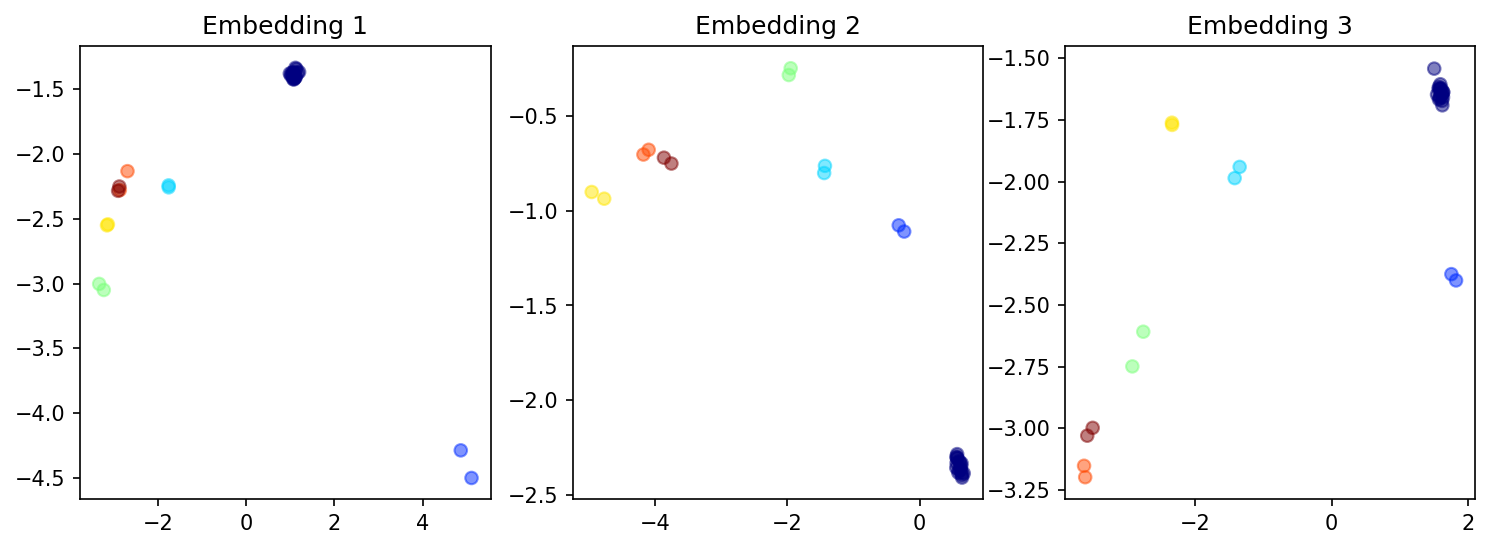

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3,
                         figsize=(12,4), dpi=150)

axes[0].scatter(x=t1.data[:,1], y=t1.data[:,2], 
                c=labels, cmap=cmap,
                alpha=0.5)
axes[0].set_title('Embedding 1')

axes[1].scatter(x=t2.data[:,1], y=t2.data[:,2], 
                c=labels, cmap=cmap,
                alpha=0.5)
axes[1].set_title('Embedding 2')

axes[2].scatter(x=t3.data[:,1], y=t3.data[:,2], 
                c=labels, cmap=cmap,
                alpha=0.5)
axes[2].set_title('Embedding 3')

plt.show()

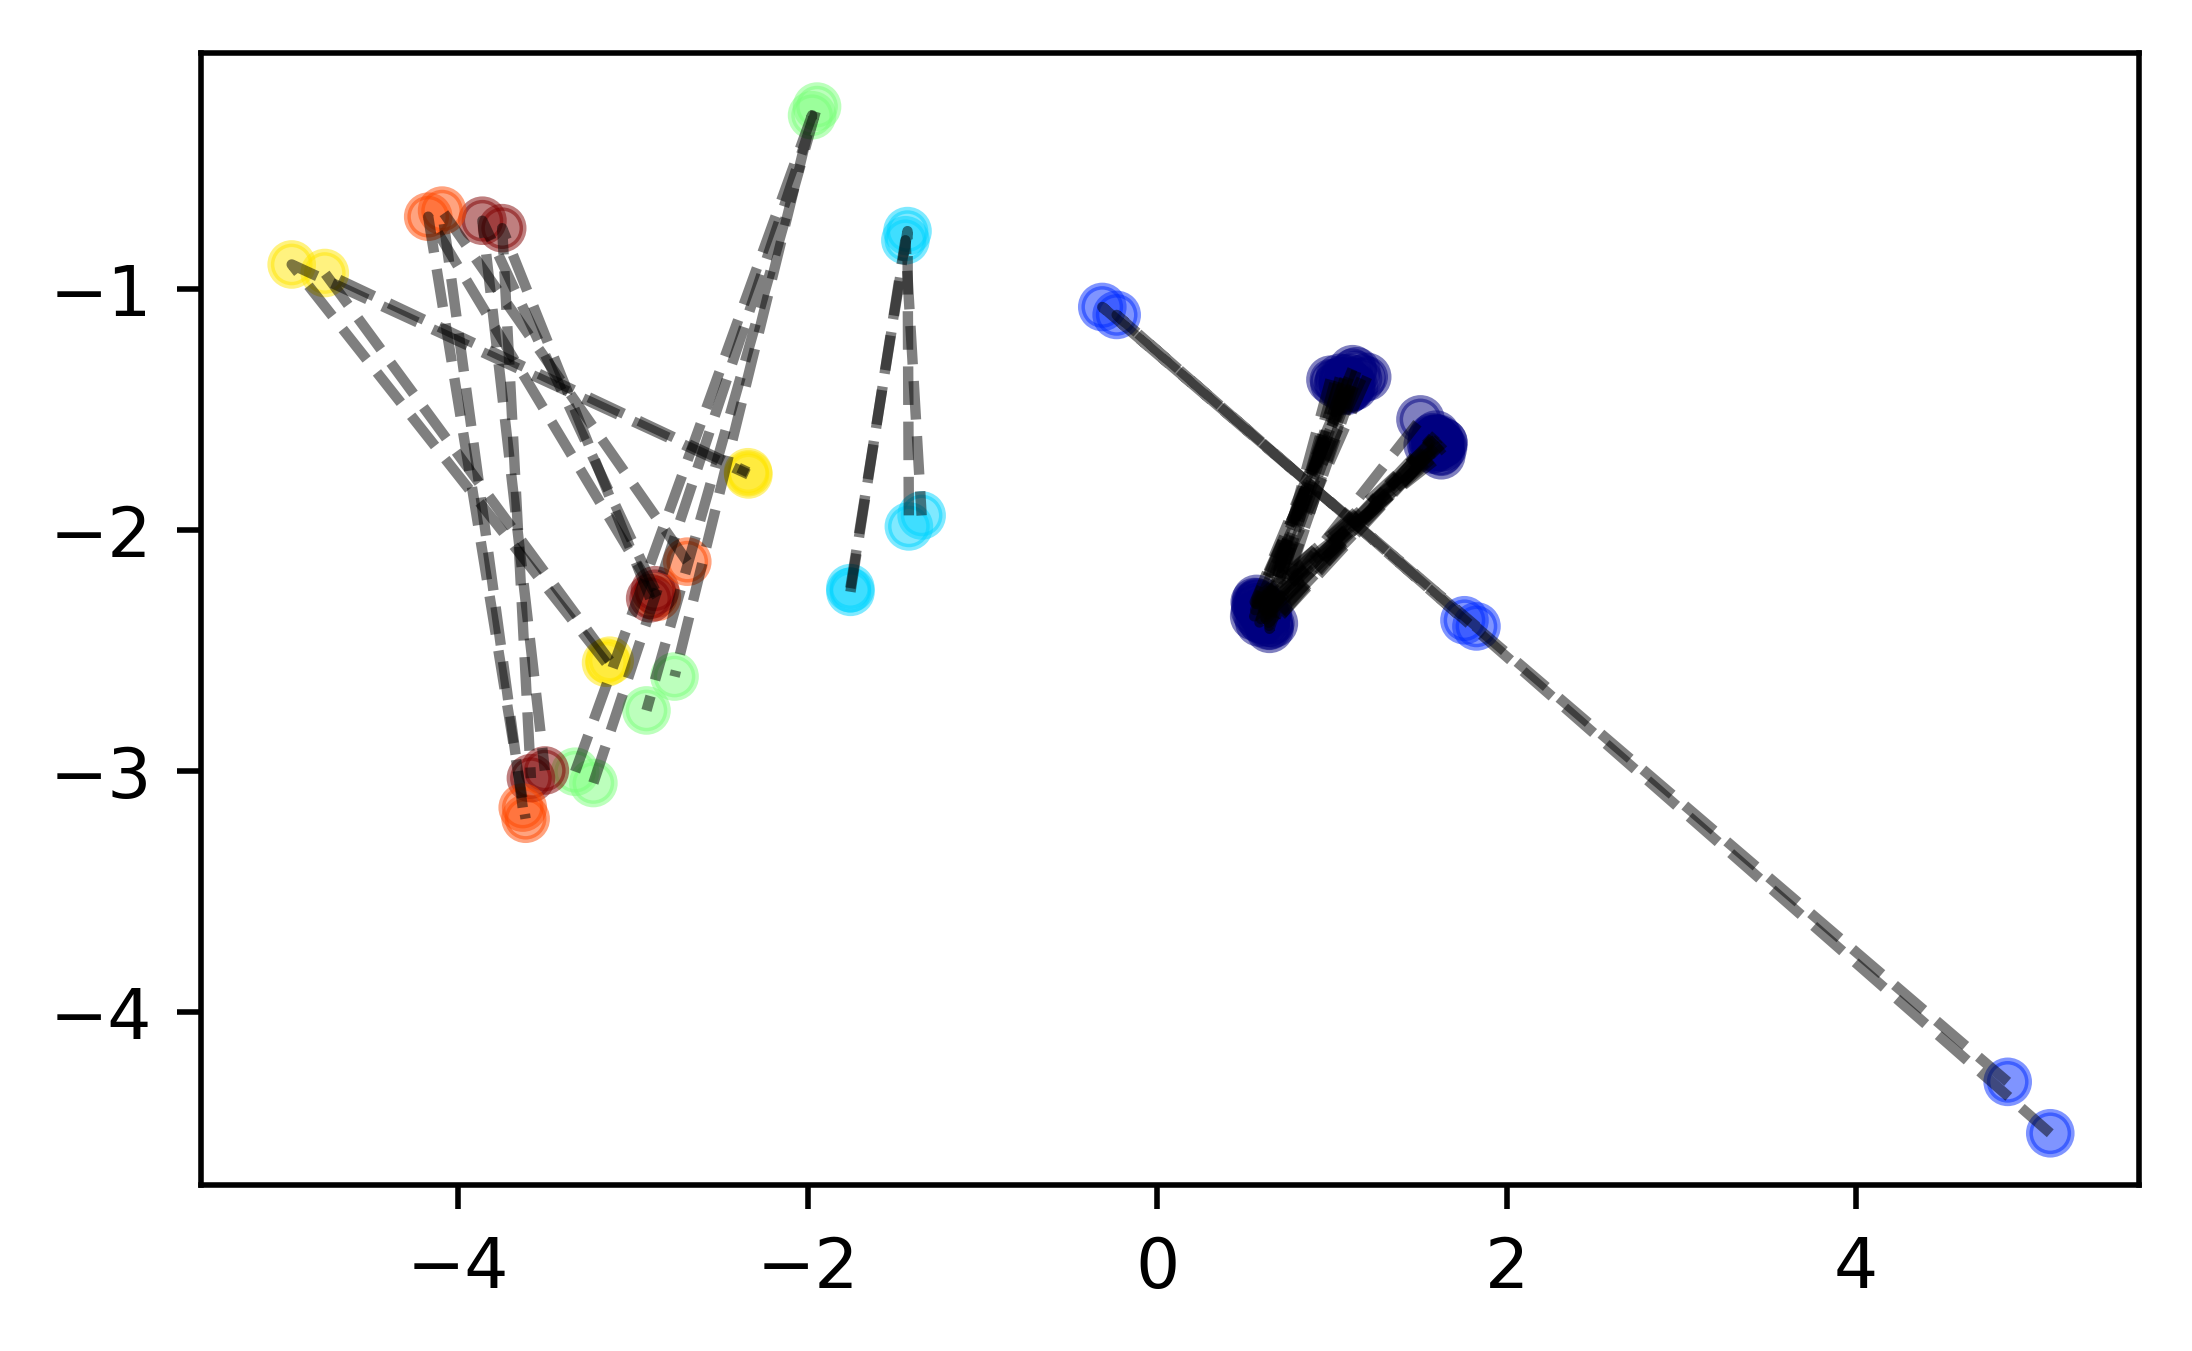

In [9]:
### Plot 3 embeddings
plt.figure(**figparams)

# Scatter plot
for emb_ in embeddings:
    plt.scatter(x=emb_.data[:,1], 
                y=emb_.data[:,2], 
                c=labels,
                cmap=cmap,
                alpha=0.5
               )

# Connect 
for node in range(t1.number_of_nodes):
    x = [emb_.data[node,1] for emb_ in embeddings]
    y = [emb_.data[node,2] for emb_ in embeddings]
    plt.plot(x,y,'k--', alpha=0.5)

plt.show()

### Analyze the graph using scan statistics

Find the k-hop neighbors locality statistic.

In [10]:
# Find the 1-hop and 2-hop neighbors

data = []

for i in G.nodes:
    
    one_hops = []
    two_hops = []
    
    for key, value in nx.single_source_shortest_path_length(G, i, cutoff=2).items():
        
        if value == 1:
            one_hops.append(int(key))
        elif value == 2:
            two_hops.append(int(key))
            
    data.append([i, len(one_hops), len(two_hops)+len(one_hops)])

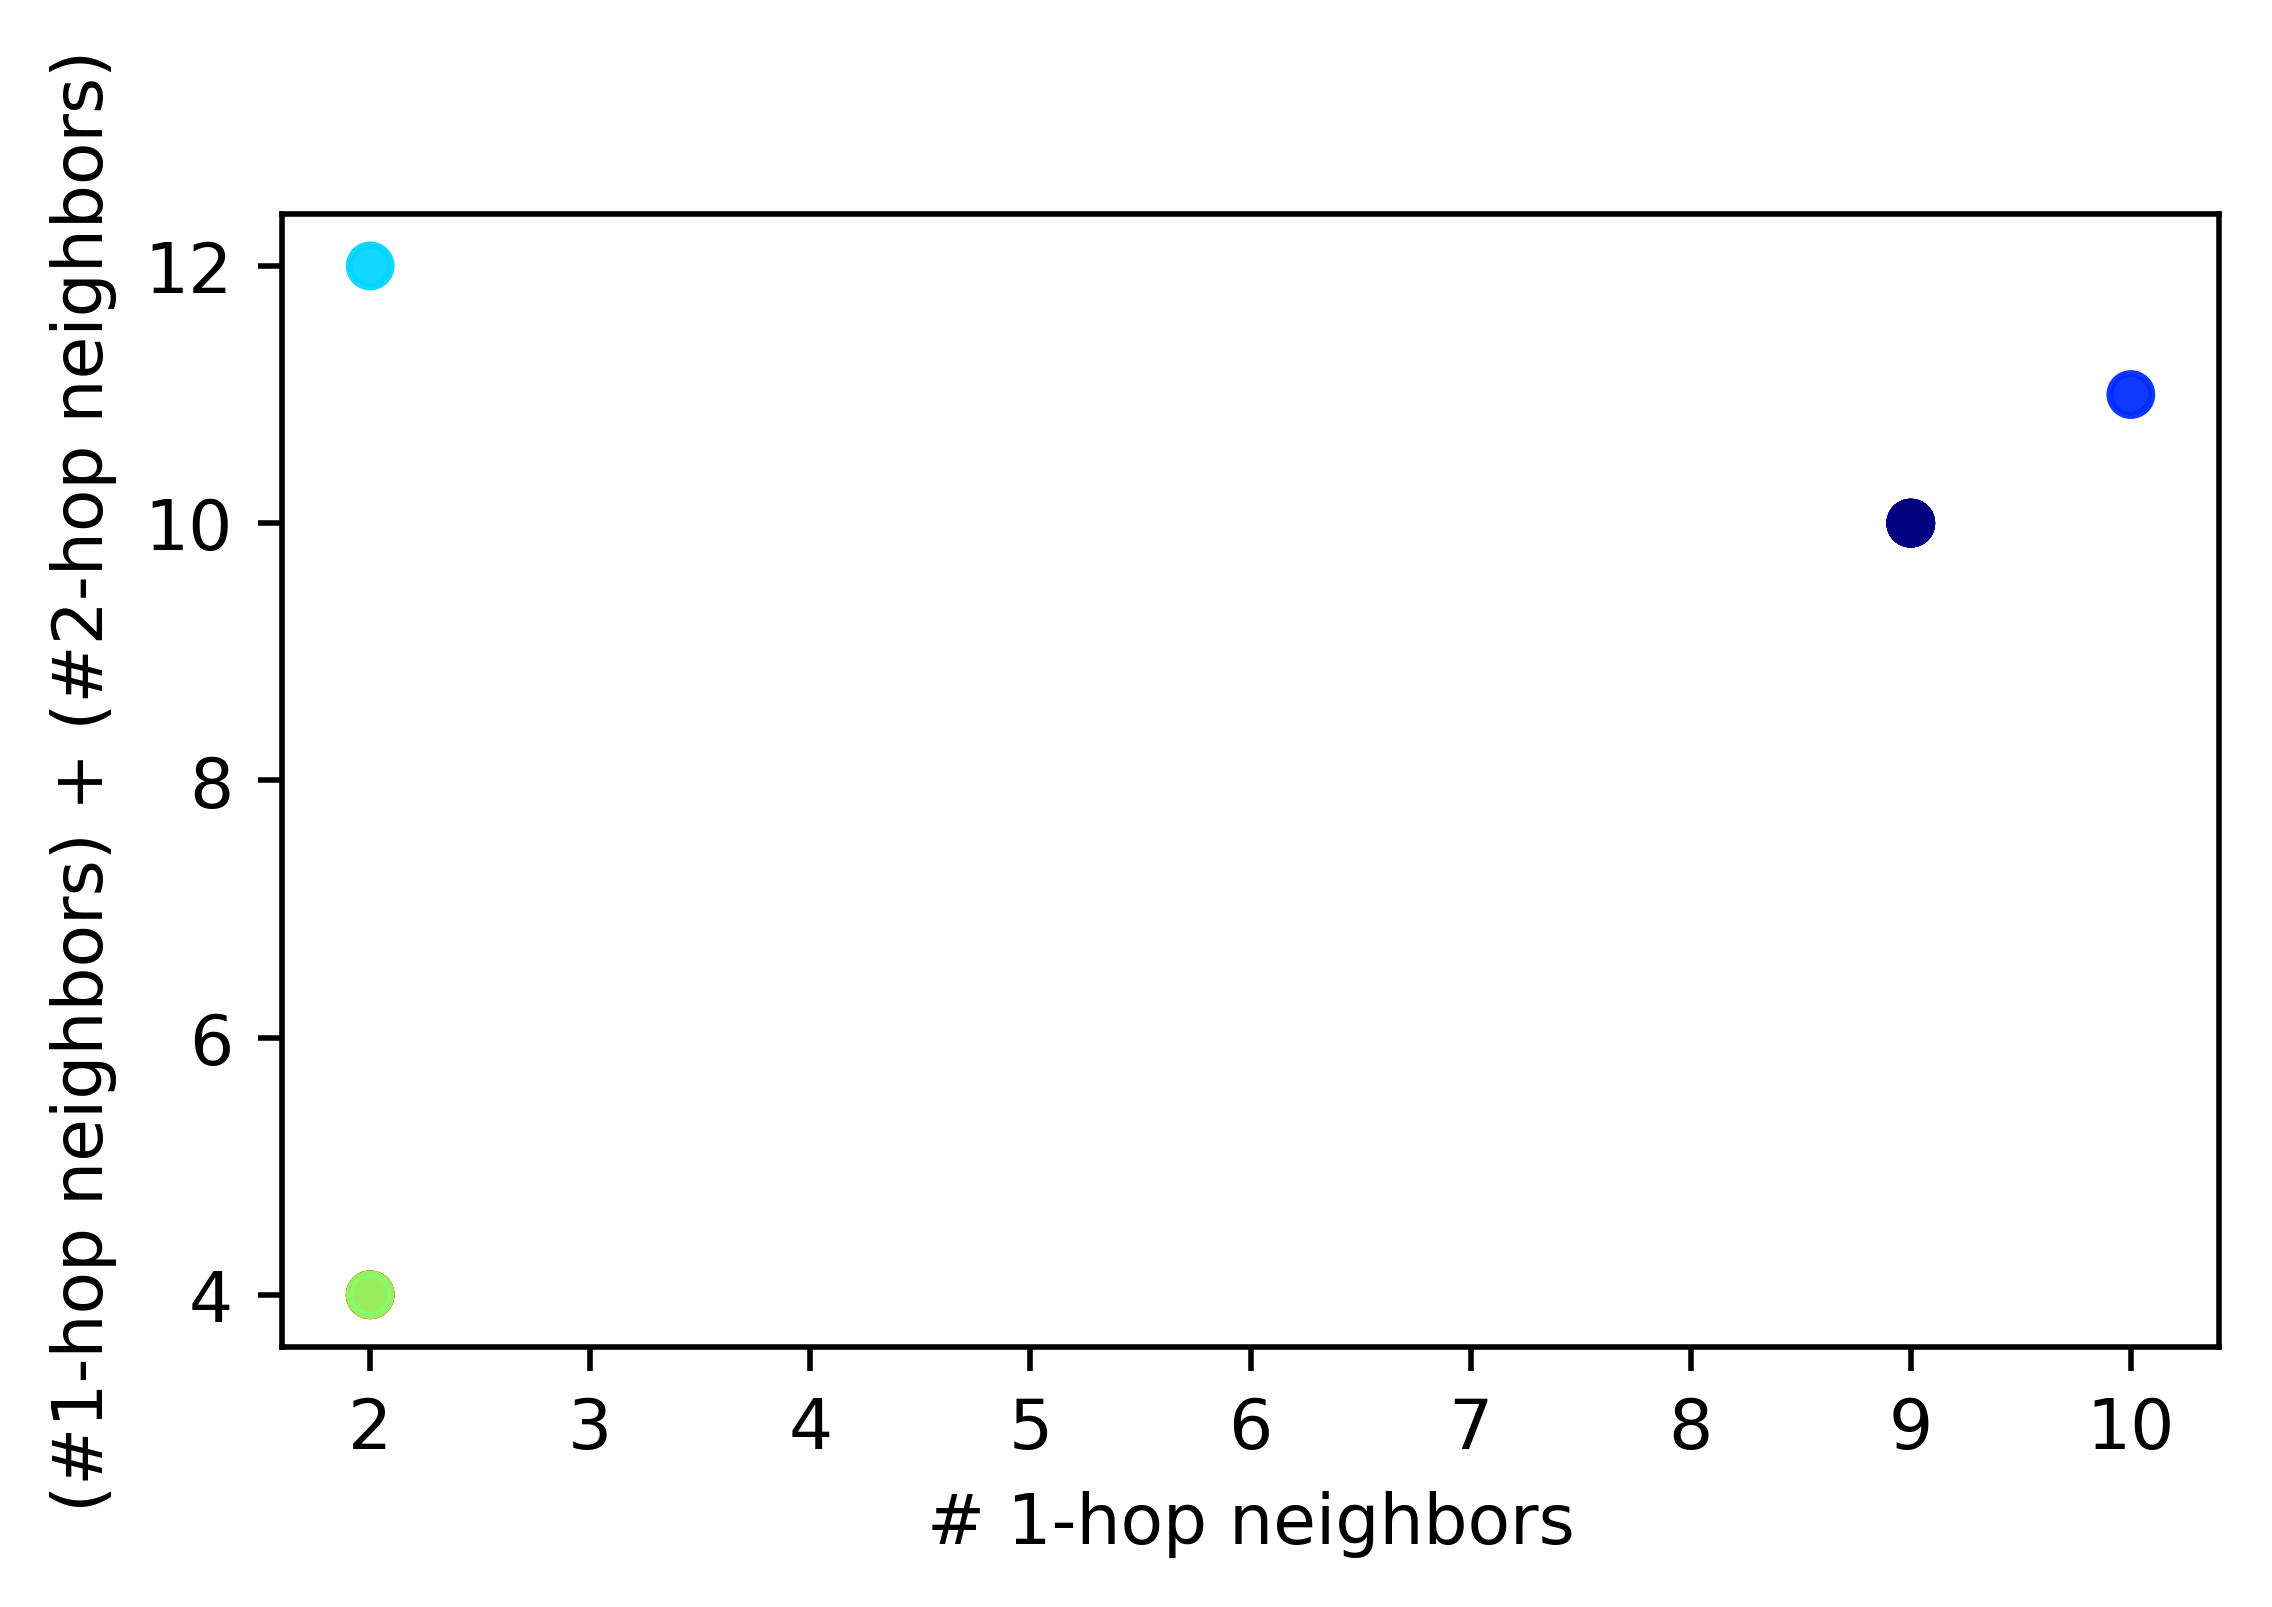

In [21]:
plt.figure(**figparams)

plt.scatter([line[1] for line in data], 
            [line[2] for line in data], 
            c=labels,
            cmap=cmap,
            alpha=0.75
           )

plt.xlabel('# 1-hop neighbors')
plt.ylabel('(#1-hop neighbors) + (#2-hop neighbors)')
plt.show()

### Final figure

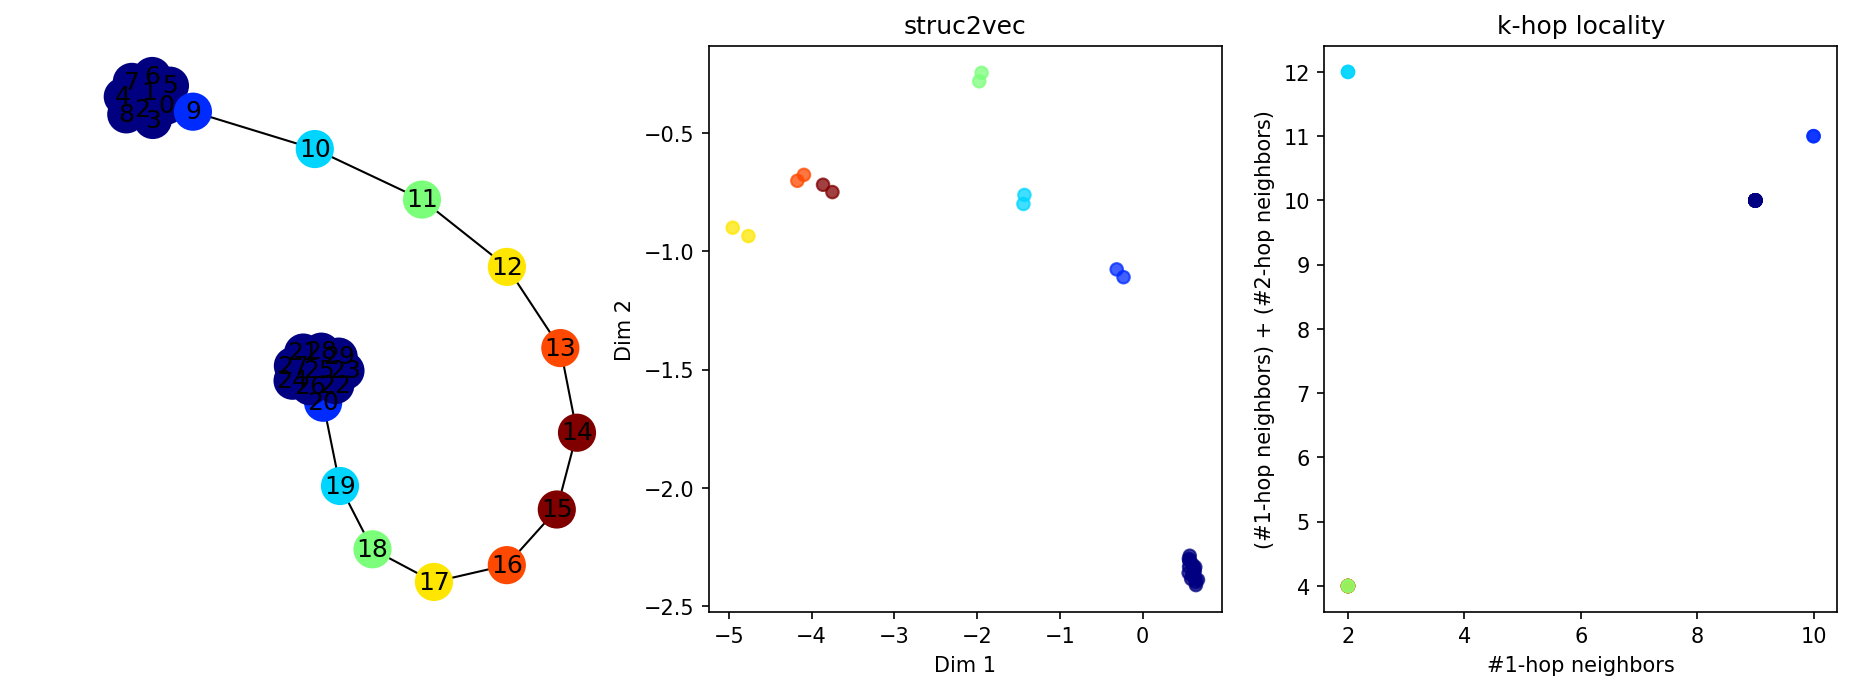

In [22]:
figparams={'figsize':(15,5), 'dpi':150}
plt.figure(**figparams)

# Plot 1
plt.subplot(131)
nx.draw(G, node_color = labels, cmap = cmap, with_labels = True)

# Plot 2
plt.subplot(132)
plt.scatter(x=t2.data[:,1], y=t2.data[:,2], 
            c=labels, cmap=cmap,
            alpha=0.75)

plt.title('struc2vec')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

# Plot 3
plt.subplot(133)
plt.scatter([line[1] for line in data], 
            [line[2] for line in data], 
            c=labels, cmap=cmap,
            alpha=0.75
           )
plt.title('k-hop locality')
plt.xlabel('#1-hop neighbors')
plt.ylabel('(#1-hop neighbors) + (#2-hop neighbors)')

plt.show()